In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df= pd.read_csv('healthcare_dataset.csv')

In [3]:
df.shape

(55500, 15)

In [4]:
df.duplicated().sum()

534

In [5]:
df.drop_duplicates(inplace=True, keep='first')

In [6]:
df['Date of Admission']=pd.to_datetime(df['Date of Admission'])
df['Discharge Date']=pd.to_datetime(df['Discharge Date'])

In [7]:
df['Hospital'].nunique()

39876

In [8]:
bins = [0, 18, 40, 60, float('inf')]
labels = ['Children', 'Youth', 'Adults', 'Seniors']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [9]:
age_condition_counts = df.groupby(['Age Group', 'Medical Condition']).size().reset_index(name='Count')

C:\Users\DIPESH LOHCHAB\AppData\Local\Temp\ipykernel_22672\2058340325.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_condition_counts = df.groupby(['Age Group', 'Medical Condition']).size().reset_index(name='Count')


# EDA

<Axes: xlabel='Age', ylabel='Count'>

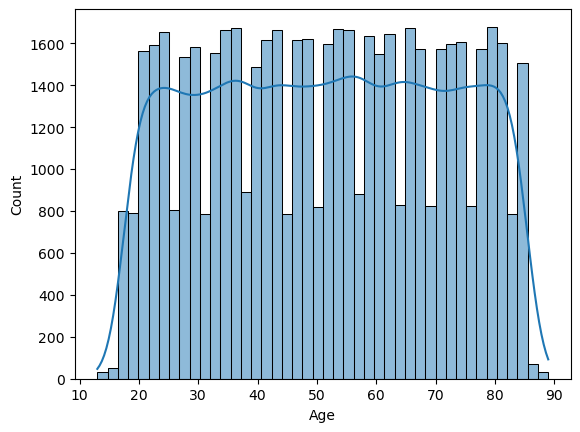

In [10]:
sns.histplot(df['Age'], kde=True)

<Axes: xlabel='Gender', ylabel='count'>

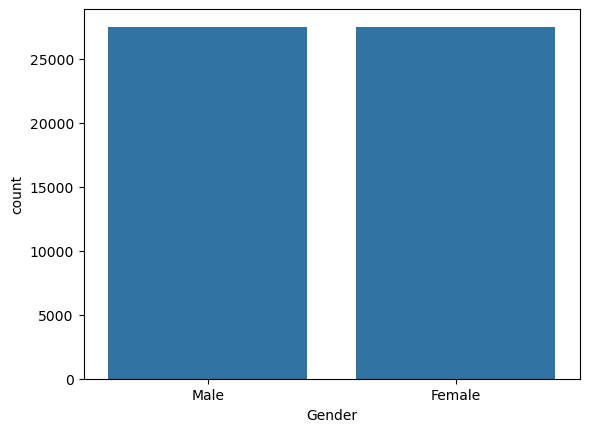

In [11]:
sns.countplot(df, x= 'Gender')

<Axes: xlabel='Blood Type', ylabel='count'>

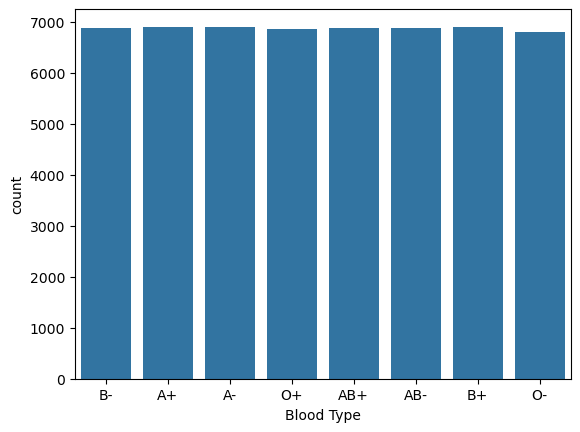

In [12]:
sns.countplot(df, x= 'Blood Type')

<Axes: xlabel='Medical Condition', ylabel='count'>

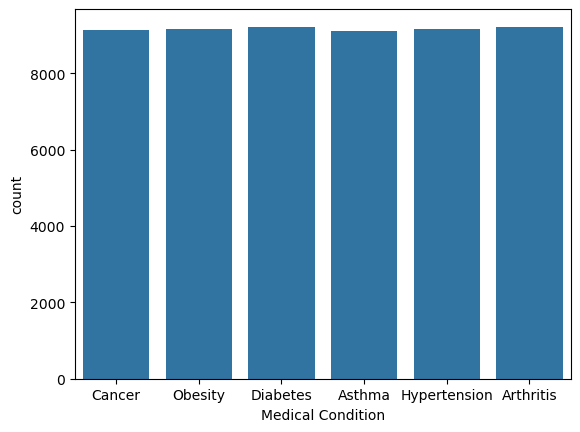

In [13]:
sns.countplot(df, x= 'Medical Condition')

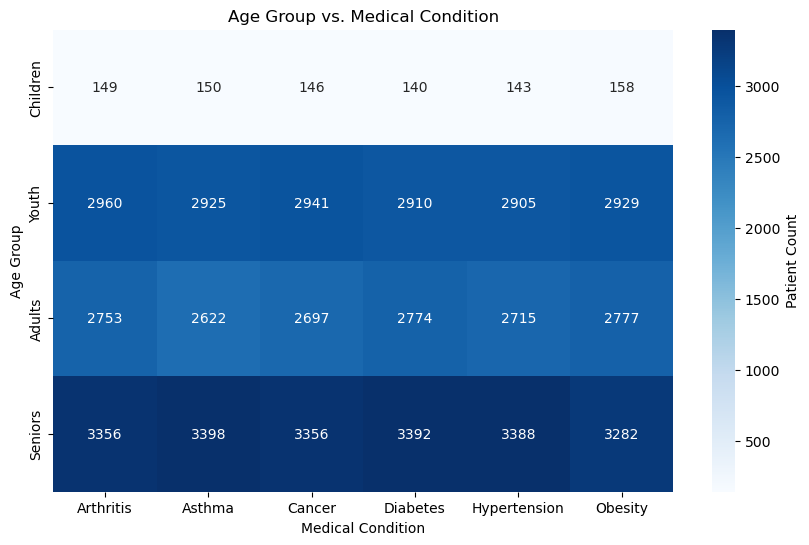

In [14]:
age_condition_pivot = age_condition_counts.pivot(index='Age Group', columns='Medical Condition', values='Count').fillna(0)
plt.figure(figsize=(10, 6))
sns.heatmap(age_condition_pivot, annot=True, cmap='Blues', fmt='g', cbar_kws={'label': 'Patient Count'})
plt.title('Age Group vs. Medical Condition')
plt.show()

In [15]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Age Group
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,Youth
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,Seniors
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,Seniors
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,Youth
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,Adults


In [16]:
df.Medication.value_counts()

Medication
Lipitor        11038
Ibuprofen      11023
Aspirin        10984
Paracetamol    10965
Penicillin     10956
Name: count, dtype: int64

# Medication vs. Medical Condition

In [17]:
medication_condition_counts = df.groupby(['Medication', 'Medical Condition']).size().reset_index(name='Count')

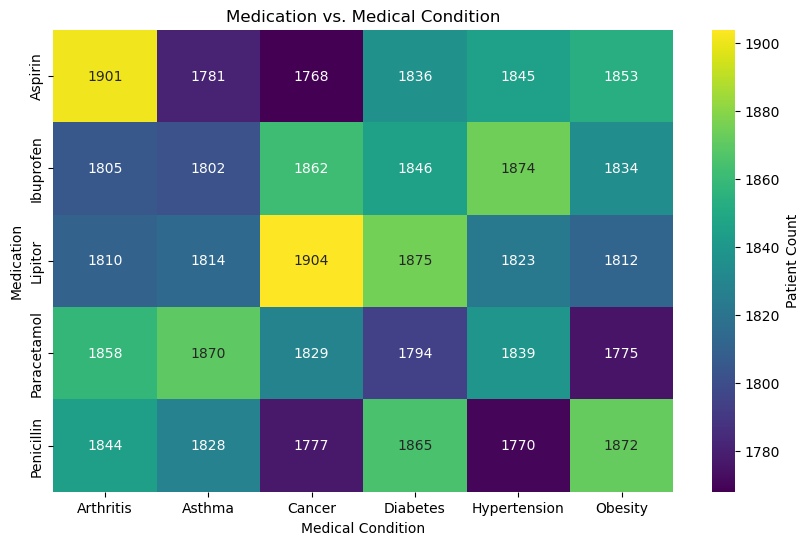

In [22]:
medication_condition_counts_pivot = medication_condition_counts.pivot(index='Medication', columns='Medical Condition', values='Count').fillna(0)
plt.figure(figsize=(10, 6))
sns.heatmap(medication_condition_counts_pivot, annot=True, cmap='viridis', fmt='g', cbar_kws={'label': 'Patient Count'})
plt.title('Medication vs. Medical Condition')
plt.show()

# Admission Trends

In [23]:
df['Year'] = df['Date of Admission'].dt.year
df['Month'] = df['Date of Admission'].dt.month
df['Day of Week'] = df['Date of Admission'].dt.day_name()

In [24]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Age Group,Year,Month,Day of Week
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,Youth,2024,1,Wednesday
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,Seniors,2019,8,Tuesday
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,Seniors,2022,9,Thursday
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,Youth,2020,11,Wednesday
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,Adults,2022,9,Monday


## Monthly Trends

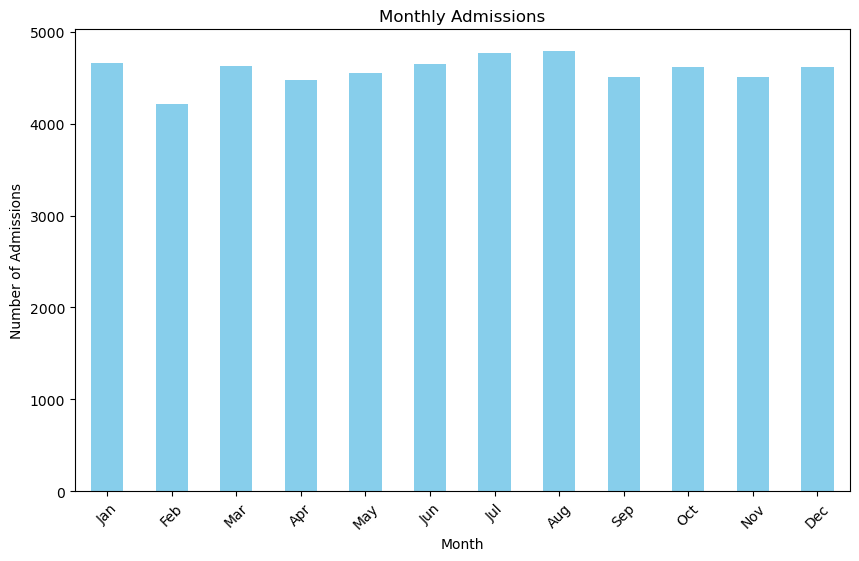

In [25]:
monthly_admissions = df.groupby('Month').size()

plt.figure(figsize=(10, 6))
monthly_admissions.plot(kind='bar', color='skyblue')
plt.title('Monthly Admissions')
plt.xlabel('Month')
plt.ylabel('Number of Admissions')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()


## Yearly Trends

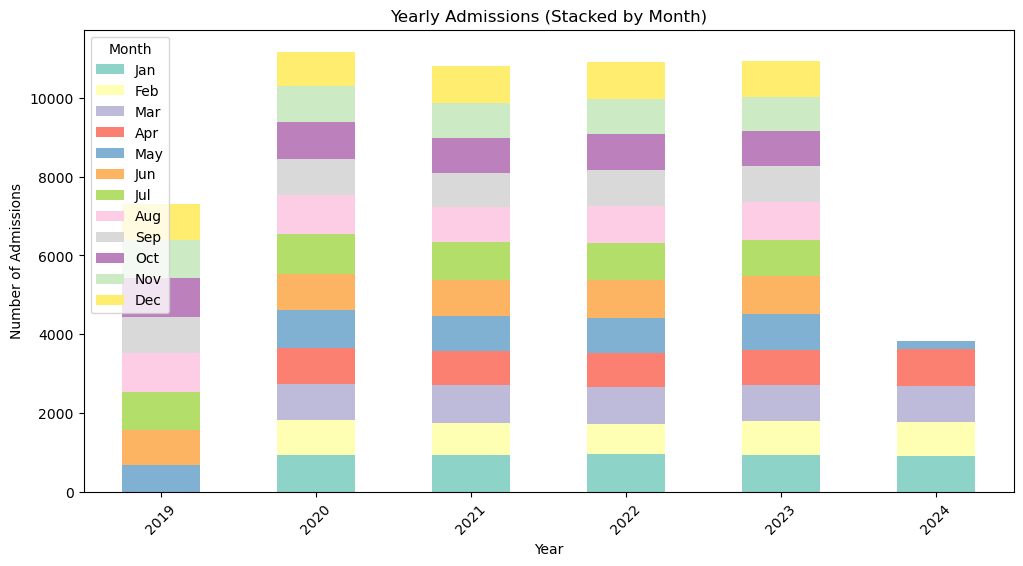

In [26]:
monthly_admissions_by_year = df.groupby(['Year', 'Month']).size().unstack(fill_value=0)

monthly_admissions_by_year.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')
plt.title('Yearly Admissions (Stacked by Month)')
plt.xlabel('Year')
plt.ylabel('Number of Admissions')
plt.xticks(rotation=45)
plt.legend(title='Month', loc='upper left', labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


## Seasonly Trends

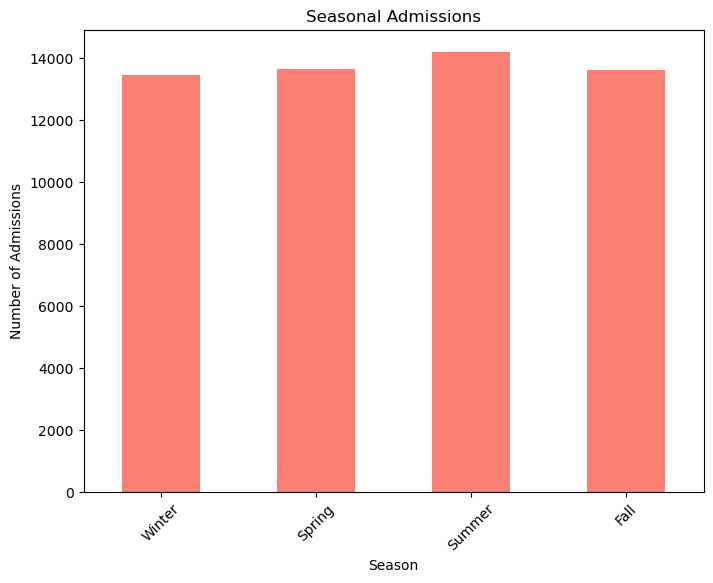

In [40]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Month'].apply(get_season)

seasonal_admissions = df.groupby('Season').size()

seasonal_admissions = seasonal_admissions[['Winter', 'Spring', 'Summer', 'Fall']]
seasonal_admissions.plot(kind='bar', color='salmon', figsize=(8, 6))
plt.title('Seasonal Admissions')
plt.xlabel('Season')
plt.ylabel('Number of Admissions')
plt.xticks(rotation=45)
plt.show()


# Insurance Provider Analysis

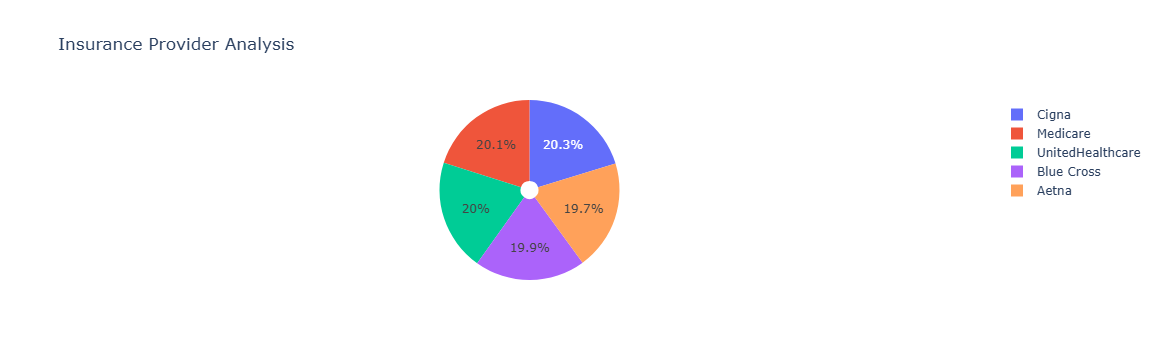

In [32]:
sales_by_category = df.groupby('Insurance Provider')['Medical Condition'].count().reset_index()
fig = px.pie(sales_by_category, values='Medical Condition', names='Insurance Provider', hole=0.1,
            title='Insurance Provider Analysis')
fig.show()

# Admission Type Analysis

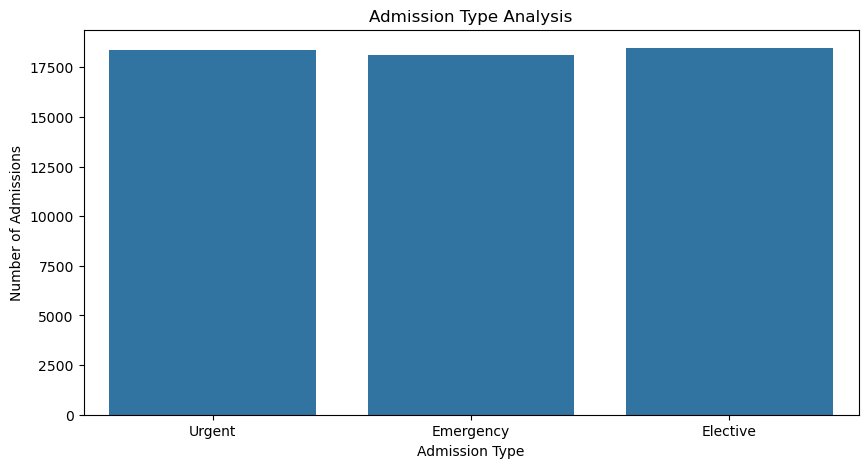

In [46]:
plt.figure(figsize=(10, 5))
sns.countplot(df, x= 'Admission Type')
plt.title("Admission Type Analysis")
plt.ylabel('Number of Admissions')
plt.show()

# Billing Amount

<Axes: xlabel='Billing Amount'>

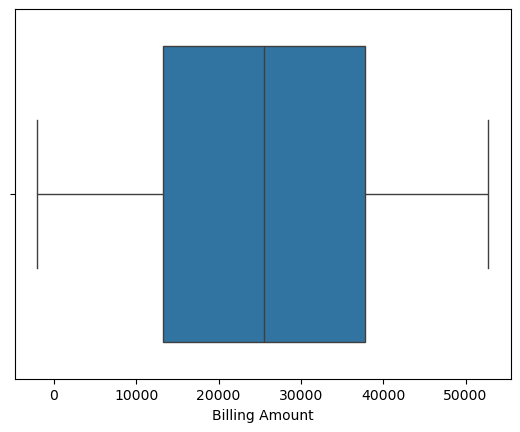

In [74]:
sns.boxplot(df, x='Billing Amount')

In [75]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,...,Admission Type,Discharge Date,Medication,Test Results,Age Group,Year,Month,Day of Week,Season,Length of Stay
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,...,Urgent,2024-02-02,Paracetamol,Normal,Youth,2024,1,Wednesday,Winter,2
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,...,Emergency,2019-08-26,Ibuprofen,Inconclusive,Seniors,2019,8,Tuesday,Summer,6
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,...,Emergency,2022-10-07,Aspirin,Normal,Seniors,2022,9,Thursday,Fall,15
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,...,Elective,2020-12-18,Ibuprofen,Abnormal,Youth,2020,11,Wednesday,Fall,30
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,...,Urgent,2022-10-09,Penicillin,Abnormal,Adults,2022,9,Monday,Fall,20


In [58]:
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

In [60]:
df.drop(columns=['Length_of_Stay'], inplace=True)

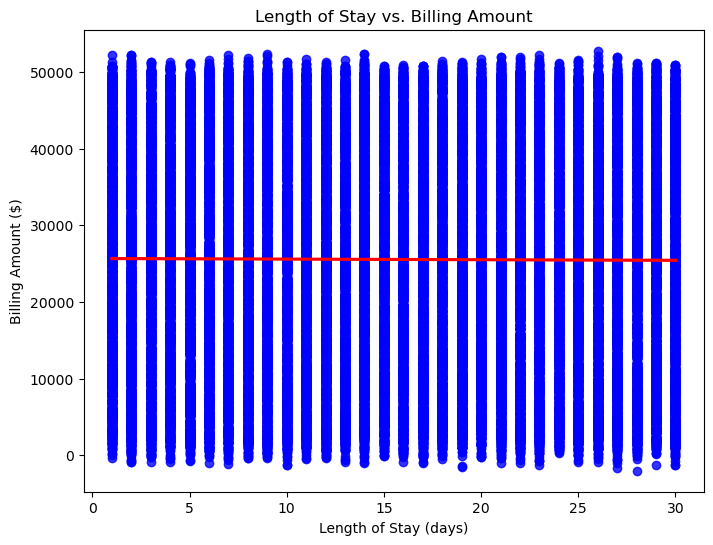

In [67]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='Length of Stay', y='Billing Amount', scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('Length of Stay vs. Billing Amount')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Billing Amount ($)')
plt.show()

# Room Usage

In [84]:
room_usage = df['Room Number'].value_counts()[:40]

print("Rooms with highest usage:")
print(room_usage.head(1))

print("\nRooms with lowest usage:")
print(room_usage.tail(1))

Rooms with highest usage:
Room Number
393    176
Name: count, dtype: int64

Rooms with lowest usage:
Room Number
198    155
Name: count, dtype: int64


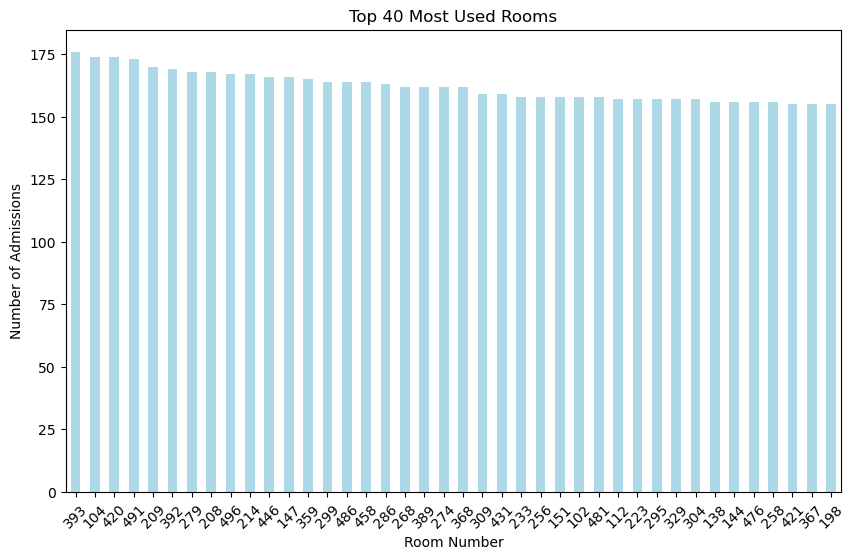

In [86]:
plt.figure(figsize=(10, 6))
room_usage.plot(kind='bar', color='lightblue')
plt.title('Top 40 Most Used Rooms')
plt.xlabel('Room Number')
plt.ylabel('Number of Admissions')
plt.xticks(rotation=45)
plt.show()

# No. of patients by each Doctor

In [98]:
doctor_patient_count = df['Doctor'].value_counts()[:50]

print("Number of patients treated by each doctor:")
print(doctor_patient_count)

Number of patients treated by each doctor:
Doctor
Michael Smith           27
John Smith              22
Robert Smith            21
James Smith             20
Michael Johnson         20
Robert Johnson          19
David Smith             19
Michael Williams        18
Christopher Smith       17
Matthew Smith           17
John Johnson            17
Michael Brown           16
Christopher Brown       15
Jennifer Johnson        15
Daniel Smith            15
David Johnson           15
William Johnson         15
Elizabeth Smith         15
Anthony Smith           14
Lisa Smith              14
Michael Davis           13
Jennifer Jones          13
Jessica Johnson         13
Eric Johnson            13
James Brown             12
John Martin             12
Christopher Williams    12
John Jones              12
Daniel Johnson          12
William Miller          12
Mary Smith              12
Jennifer Hernandez      12
Daniel Jones            12
James Johnson           12
Mark Brown              11
Jenni

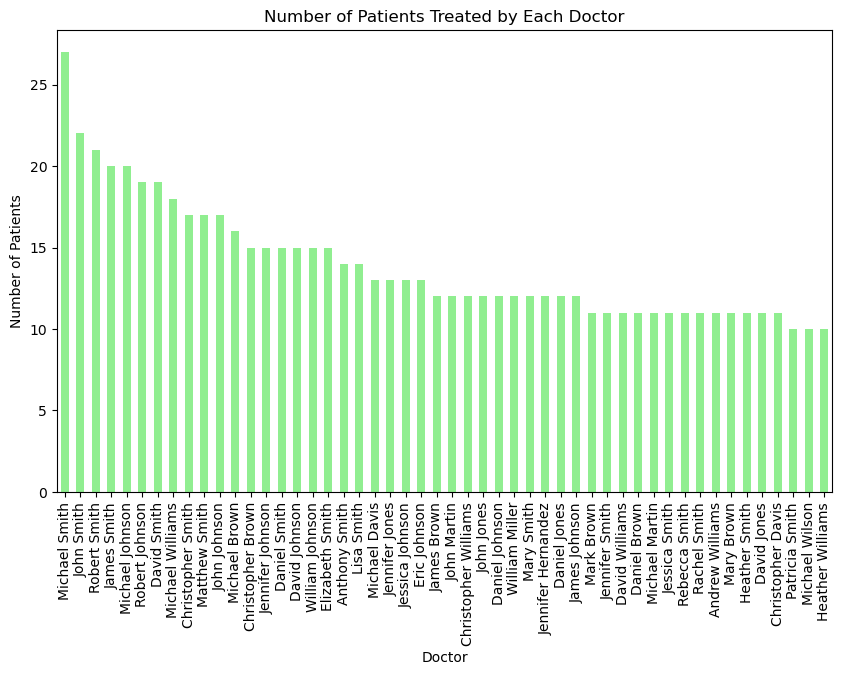

In [99]:
plt.figure(figsize=(10, 6))
doctor_patient_count.plot(kind='bar', color='lightgreen')
plt.title('Number of Patients Treated by Each Doctor')
plt.xlabel('Doctor')
plt.ylabel('Number of Patients')
plt.show()

In [100]:
insurance_billing_avg = df.groupby('Insurance Provider')['Billing Amount'].mean()
print("Average Billing Amount by Insurance Provider:")
print(insurance_billing_avg)

Average Billing Amount by Insurance Provider:
Insurance Provider
Aetna               25549.689648
Blue Cross          25603.460603
Cigna               25525.998670
Medicare            25628.320208
UnitedHealthcare    25414.506208
Name: Billing Amount, dtype: float64


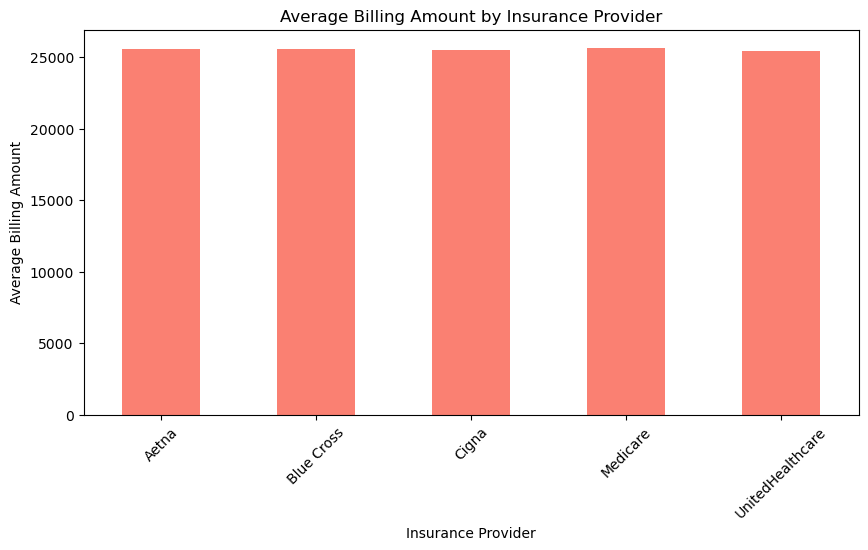

In [114]:
plt.figure(figsize=(10, 5))
insurance_billing_avg.plot(kind='bar', color='salmon')
plt.title('Average Billing Amount by Insurance Provider')
plt.xlabel('Insurance Provider')
plt.ylabel('Average Billing Amount')
plt.xticks(rotation=45)
plt.show()

C:\Users\DIPESH LOHCHAB\AppData\Local\Temp\ipykernel_22672\3271497068.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




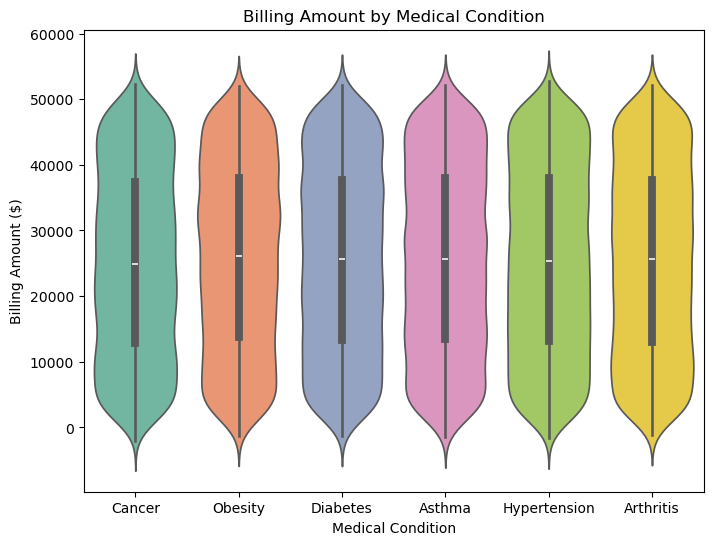

In [106]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Medical Condition', y='Billing Amount', data=df, palette='Set2')
plt.title('Billing Amount by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Billing Amount ($)')
plt.show()


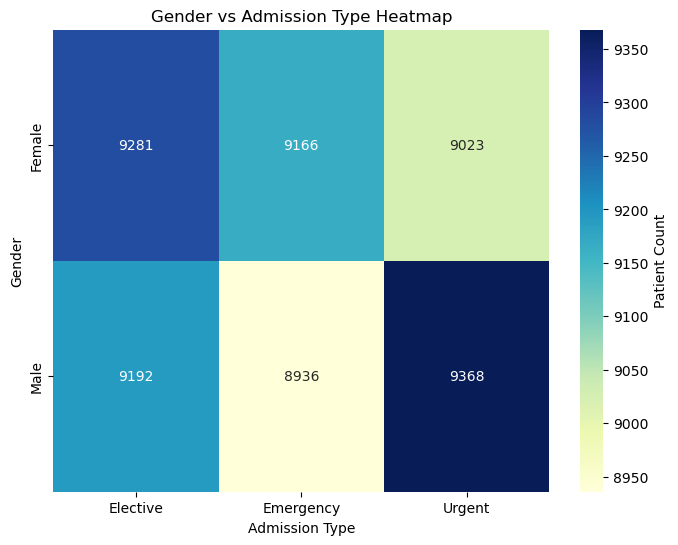

In [110]:
contingency_table = pd.crosstab(df['Gender'], df['Admission Type'])
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d',cbar_kws={'label': 'Patient Count'})
plt.title('Gender vs Admission Type Heatmap')
plt.xlabel('Admission Type')
plt.ylabel('Gender')
plt.show()

**While the number of elective and emergency admissions is relatively balanced between genders, there is a noticeable increase in urgent admissions for males compared to females.**

C:\Users\DIPESH LOHCHAB\AppData\Local\Temp\ipykernel_22672\1348492340.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




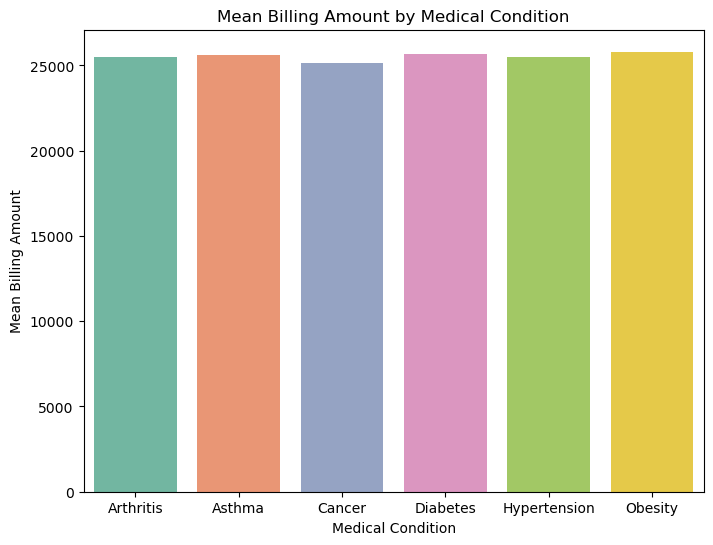

In [113]:
mean_billing = df.groupby('Medical Condition')['Billing Amount'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Medical Condition', y='Billing Amount', data=mean_billing, palette='Set2')
plt.title('Mean Billing Amount by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Mean Billing Amount')
plt.show()
